# Cross-Validation

In [ ]:
"""
hold out 방법 : 운이 좋으면 잘 나오지만 그렇지 않을 수 있는 것이 큰 단점이다. 
더욱이 데이터가 작으면 더욱 문제(오버피팅)가 된다. 데이터가 많을때 사용, 
데이터를 2분화 시키는 방법
"""

In [3]:
from sklearn.datasets import load_digits
digits = load_digits() # 손글씨 데이터

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

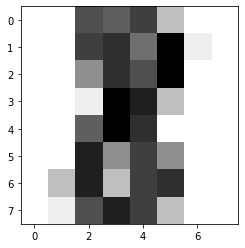

In [6]:
plt.imshow(digits.data[40].reshape(8,8), cmap=plt.cm.gray_r)

In [7]:
digits.target[40]

8

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
# digits.target : 실제 아웃풋 값이 들어가 있다
# 75:25로 기본 쪼개진다.

In [10]:
X_train

array([[ 0.,  3., 13., ..., 12.,  9.,  1.],
       [ 0.,  0.,  1., ..., 13.,  1.,  0.],
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]])

In [11]:
X_train.shape

(1347, 64)

### k-NN(Nearest Neighber)

In [ ]:
"""
k-최근접 이웃 분류
가장 간단한 k-NN 알고리즘은 가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측에 사용
"""

In [ ]:
"""
최근접 이웃의 수가 하나일 때는 훈련 데이터에 대한 예측이 완벽합니다.
하지만 이웃의 수가 늘어나면 모델은 단순해지고 훈련 데이터의 정확도는 줄어듭니다.
이웃을 하나 사용한 테스트 세트의 정확도는 이웃을 많이 사용했을 때보다 낮습니다.
이것은 1-최근접 이웃이 모델을 너무 복잡하게 만든다는 것을 설명해줍니다.
반대로 이웃을 10개 사용했을 때는 모델이 너무 단순해서 정확도는 더 나빠집니다.
정확도가 가장 좋을 때는 중간 정도인 여섯 개를 사용한 경우입니다.
"""

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

model = KNeighborsClassifier()
#model = LogisticRegression()
#model = DecisionTreeClassifier()

### K-폴드 교차검증(K-fold cross validation)

In [ ]:
"""
데이터의 수가 적은 경우에는 이 데이터 중의 일부인 검증 데이터의 수도 적기 때문에 검증 성능의 신뢰도가 떨어진다. 그렇다고 검증 데이터의 수를 증가시키면 학습용 데이터의 수가 적어지므로 정상적인 학습이 되지 않는다. 이러한 딜레마를 해결하기 위한 검증 방법이 K-폴드(K-fold) 교차검증 방법이다.
K-폴드 교차검증에서는 다음처럼 학습과 검증을 반복한다.
전체 데이터를 K개의 부분 집합( {D1,D2,⋯,DK} )으로 나눈다.
데이터 {D1,D2,⋯,DK−1} 를 학습용 데이터로 사용하여 회귀분석 모형을 만들고 데이터 {DK} 로 교차검증을 한다.
데이터 {D1,D2,⋯,DK−2,DK} 를 학습용 데이터로 사용하여 회귀분석 모형을 만들고 데이터 {DK−1} 로 교차검증을 한다. ⋮
데이터 {D2,⋯,DK} 를 학습용 데이터로 사용하여 회귀분석 모형을 만들고 데이터 {D1} 로 교차검증을 한다.
이렇게 하면 총 K개의 모형과 K개의 교차검증 성능이 나온다. 이 K개의 교차검증 성능을 평균하여 최종 교차검증 성능을 계산한다.
"""

In [16]:
# 크로스 밸리데이션
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train)
scores
# 예제 데이터가 심플하여 일반적인 예측 알고리즘에서도 결과가 좋다

array([0.98888889, 0.9962963 , 0.9739777 , 0.98513011, 0.98513011])

In [17]:
# k를 조정하여 열번(cv=10) 돌려본다.
scores = cross_val_score(model, X_train, y_train, cv=10)
scores

array([0.98518519, 0.98518519, 0.99259259, 1.        , 0.98518519,
       0.96296296, 1.        , 0.97014925, 0.98507463, 0.99253731])

In [18]:
print("Mean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\nMax: {:.3f}".format(
    scores.mean(), scores.std(), scores.min(), scores.max()))
# 분산이 작으면 Overfitting 이 적다

Mean: 0.986
Std: 0.011
Min: 0.963
Max: 1.000


### LOOCV(Leave-One-Out Cross-Validation)

In [19]:
# 하나씩 빼면서 돌린다. 테이터 데이터를 하나로 두는 것. 데이터 수많큼 크로스 벨리데이션 한다.
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X_train, y_train, cv=LeaveOneOut())
scores.mean()

0.9881217520415738

### Shuffle-Split Cross-Validation

In [20]:
from sklearn.model_selection import ShuffleSplit

sscv = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)

In [21]:
scores = cross_val_score(model, X_train, y_train, cv=sscv)
scores.mean()

0.9768545994065283

# Model Tuning

### Grid search , Random Search 를 주로 사용

##### Set the parameters for grid search

In [22]:
# 파라미터는 dict 타입으로 지정됨.
param_grid = {'n_neighbors': range(1,5),
              'weights': ['uniform','distance']}
param_grid

{'n_neighbors': range(1, 5), 'weights': ['uniform', 'distance']}

##### Grid search with cross-validation

In [24]:
#  자동으로 복수개의 내부 모형을 생성하고 이를 모두 실행시켜서 
#  최적 파라미터를 찾아준다
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)

#n_jobs=-1: 너가 가지고 있는 컴퓨터 리소스를 최대한 이용해 돌려라
# 1 : 2 core를 사용하라

In [25]:
%%timeit # 아래소스가 돌때 얼마나 걸리는지 알려
grid_search.fit(X_train, y_train)

372 ms ± 3.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


##### Evaluate the model with best parameters

In [27]:
grid_search.score(X_test, y_test), KNeighborsClassifier().fit(X_train, y_train).score(X_test, y_test)

(0.9888888888888889, 0.98)

In [28]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best CV score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best CV score: 0.99


In [29]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
KNeighborsClassifier(n_neighbors=3, weights='distance')


##### When the parameters are asymmetric

In [30]:
# In the case of SVM
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

### Random Search CV

##### Set the parameters for random search

In [31]:
#from scipy.stats import uniform as sp_rand
from scipy.stats import randint as sp_randint
# sp_randint(1, 100) : 1 ~ 100까지 랜덤한 정수값을 리턴
# 랜덤CV가 돌때 함수가 실행
param_grid = {'n_neighbors': sp_randint(1, 100), 
              'weights': ['uniform','distance']}
param_grid

{'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen at 0x239c3b33eb0>,
 'weights': ['uniform', 'distance']}

##### Random search with cross-validation

In [32]:
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_grid, n_iter=20, random_state=1)
# n_iter=20 : 이 중에 20개의 조합을 Random 하게 선택

In [33]:
rand_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000239C3B33EB0>,
                                        'weights': ['uniform', 'distance']},
                   random_state=1)

##### Evaluate the model with best parameters

In [34]:
rand_search.score(X_test, y_test)

0.9844444444444445

In [37]:
print("Best estimator:\n{}".format(rand_search.best_estimator_))

Best estimator:
KNeighborsClassifier(n_neighbors=6, weights='distance')


In [35]:
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9  # 숫자 9를 posive class로 설정

In [36]:
(y == True).sum()

180

Populating the interactive namespace from numpy and matplotlib


4

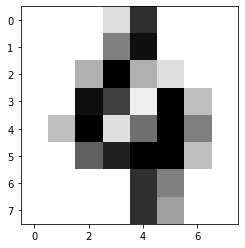

In [38]:
import matplotlib.pyplot as plt
%pylab inline

plt.imshow(digits.data[100].reshape(8,8), cmap=plt.cm.gray_r)
digits.target[100]

In [40]:
digits.data[100].reshape(8,8)

array([[ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16.,  5.,  2.,  0.,  0.],
       [ 0.,  0., 15., 12.,  1., 16.,  4.,  0.],
       [ 0.,  4., 16.,  2.,  9., 16.,  8.,  0.],
       [ 0.,  0., 10., 14., 16., 16.,  4.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  6.,  0.,  0.]])

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

### Training Models

In [42]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

### Accuracy

In [44]:
from sklearn.metrics import accuracy_score
print("Dummy model:")
print(accuracy_score(y_test, pred_dummy))
print("Decision tree:")
print(accuracy_score(y_test, pred_tree))

Dummy model:
0.8955555555555555
Decision tree:
0.9177777777777778


##### Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix
print("Dummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("Decision tree:")
print(confusion_matrix(y_test, pred_tree))

Dummy model:
[[403   0]
 [ 47   0]]
Decision tree:
[[390  13]
 [ 24  23]]


In [ ]:
### Recall, Precision & F1

In [46]:
from sklearn.metrics import classification_report
print("Dummy model:")
print(classification_report(y_test, pred_dummy, 
                            target_names=["not 9", "9"]))
print("\nDecision tree:")
print(classification_report(y_test, pred_tree, 
                            target_names=["not 9", "9"]))

Dummy model:
              precision    recall  f1-score   support

       not 9       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450


Decision tree:
              precision    recall  f1-score   support

       not 9       0.94      0.97      0.95       403
           9       0.64      0.49      0.55        47

    accuracy                           0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450



C:\Users\028\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
"""
결과에서 9가 아니라고 예측한 데이터의 94%가 실제로 9가 아니었고
9이라고 예측한 데이터의 64%만 실제로 9이었음을 알 수 있다.
또한 실제 9가 아닌 데이터 중의 97%가 9가 아닌 것으로 판별되었고
실제 9인 데이터 중의 49%만 9로 판별되었음을 알 수 있다.
"""

In [ ]:
"""
PR curve
Precision-Recall은 클래스가 매우 불균형한 경우 예측의 성공을 측정하는 데 유용하다
정보 검색에서 정밀도는 결과 관련성의 척도인 반면, 리콜은 실제로 관련된 결과가 얼마나 많이 반환되는지를 측정하는 척도이다.
(참고) https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
"""

In [47]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(precisions, recalls) :
    plt.plot(recalls, precisions, color='blue')
    plt.axis([0,1,0,1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PR curve')

In [48]:
precisions, recalls, _ = precision_recall_curve(y_test, 
                                    tree.predict_proba(X_test)[:,1])

In [49]:
precisions

array([0.10444444, 0.29752066, 0.46774194, 0.63888889, 1.        ])

In [50]:
recalls

array([1.        , 0.76595745, 0.61702128, 0.4893617 , 0.        ])

In [51]:
_

array([0.02      , 0.06521739, 0.22580645, 0.71551724])

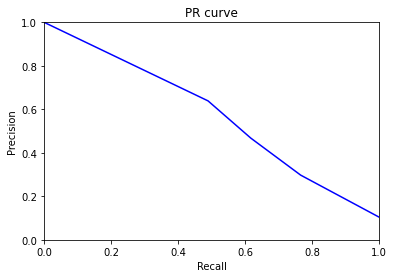

In [52]:
plot_precision_recall_curve(precisions, recalls)

In [ ]:
"""
ROC(Receiver Operating Characteristic)
모든 임계값에서 분류 모델의 성능을 보여 주는 그래프
"""

### ROC & AUC

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

##### AUC(Area Under the Curve)

In [ ]:
# ROC 곡선 아래 영역

In [54]:
# 모델이 예측한 확률이 필요
# 0, 1 중 1의 값만 뽑아라
fpr, tpr, _ = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
auc(fpr, tpr)

0.8213135526107387

##### Define ROC curve drawing fuction

In [55]:
def plot_roc_curve(fpr, tpr, model, color=None) :
    model = model + ' (auc = %0.3f)' % auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model, color=color)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR (1 - specificity)')
    plt.ylabel('TPR (recall)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")

##### Plot multiple ROC curves

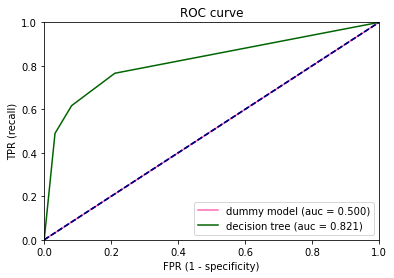

In [56]:
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, 
                                    dummy.predict_proba(X_test)[:,1])
plot_roc_curve(fpr_dummy, tpr_dummy, 'dummy model', 'hotpink')
fpr_tree, tpr_tree, _ = roc_curve(y_test, 
                                  tree.predict_proba(X_test)[:,1])
plot_roc_curve(fpr_tree, tpr_tree, 'decision tree', 'darkgreen')